# MOHAMMED ABDUL SHOAIB- M00974546
## CST 4070 - BLOCK 2 CHALLENGE

In [110]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [111]:
#read the csv file
df=pd.read_csv('listings.csv')
df.head()

C:\Users\Majeed\AppData\Local\Temp\ipykernel_18852\419892069.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('listings.csv')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21


In [112]:
df.shape

(87946, 75)

In [113]:
df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.794600e+04,87946,8.794600e+04,87946,87946,87946,86679,47190,87943,8.794600e+04,...,64851.000000,64821.000000,64820.000000,1,87946,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000
unique,NaN,87946,NaN,2,2,21356,79800,38350,85585,NaN,...,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/92644,NaN,2023-09-06,city scrape,Rental unit in Greater London · 1 bedroom · 1 ...,Keep it simple at this peaceful and centrally-...,The residence is ideally situated south of the...,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,...,NaN,NaN,NaN,VFT/MA/58386,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,48910,55934,3029,246,120,29,NaN,...,NaN,NaN,NaN,1,62737,NaN,NaN,NaN,NaN,NaN
mean,3.586523e+17,NaN,2.023091e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.589904e+08,...,4.798890,4.720487,4.593404,NaN,NaN,18.140950,13.852284,4.133548,0.029154,1.014903
std,4.121119e+17,NaN,2.626577e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.694033e+08,...,0.451838,0.421893,0.536391,NaN,NaN,63.745275,46.876541,24.742723,0.490367,1.365452
min,1.391300e+04,NaN,2.023091e+13,NaN,NaN,NaN,NaN,NaN,NaN,4.775000e+03,...,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,NaN,2.023091e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.186737e+07,...,4.790000,4.630000,4.490000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,4.935854e+07,NaN,2.023091e+13,NaN,NaN,NaN,NaN,NaN,NaN,8.140696e+07,...,4.970000,4.840000,4.740000,NaN,NaN,2.000000,1.000000,0.000000,0.000000,0.540000
75%,8.164776e+17,NaN,2.023091e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.668211e+08,...,5.000000,5.000000,4.960000,NaN,NaN,6.000000,3.000000,1.000000,0.000000,1.320000


## Column Selection for Streamlined Analysis:
We're dropping several columns from the dataset due to various reasons. Some of these columns exhibit a high count of missing values, making their data integrity questionable for meaningful analysis. Additionally, certain columns contain redundant or overlapping information compared to other more informative features, thus providing little added value to our analytical goals. Furthermore, several columns consist of details not directly relevant to the analysis at hand, such as textual descriptions, or specific host-related information. By removing these columns, we aim to streamline the dataset, focusing on essential and reliable features crucial for our analytical models, enhancing the accuracy and relevance of our findings.

In [114]:
columns_to_remove = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description',
    'neighborhood_overview', 'picture_url', 'host_id', 'host_name', 'host_since',
    'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url',
    'host_picture_url', 'host_neighbourhood', 'host_listings_count',
    'host_total_listings_count', 'host_verifications', 'neighbourhood',
    'neighbourhood_group_cleansed', 'property_type',
    'accomodates', 'bathrooms', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
    'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
    'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value','license', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]

# Drop the specified columns from the DataFrame
df1 = df.drop(columns=columns_to_remove, errors='ignore')
print(df1.head(5)) 

                                   host_url host_response_rate  \
0  https://www.airbnb.com/users/show/498201                NaN   
1  https://www.airbnb.com/users/show/499704               100%   
2   https://www.airbnb.com/users/show/54730               100%   
3   https://www.airbnb.com/users/show/60302               100%   
4  https://www.airbnb.com/users/show/497514                90%   

  host_acceptance_rate host_is_superhost host_has_profile_pic  \
0                 100%                 f                    t   
1                  25%                 f                    t   
2                  88%                 f                    t   
3                  41%                 f                    t   
4                  75%                 t                    t   

  host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                      t              Wandsworth  51.44201   -0.18739   
1                      t  Hammersmith and Fulham  51.49993   -0.21

## EXPLORATORY DATA ANALYSIS (EDA)

In [115]:
#missing values
df1.isna().sum()

host_url                      0
host_response_rate        28918
host_acceptance_rate      25188
host_is_superhost           932
host_has_profile_pic          5
host_identity_verified        5
neighbourhood_cleansed        0
latitude                      0
longitude                     0
room_type                     0
accommodates                  0
bathrooms_text              103
bedrooms                  32774
beds                       1134
amenities                     0
price                         0
minimum_nights                0
maximum_nights                0
has_availability              0
availability_365              0
number_of_reviews             0
number_of_reviews_ltm         0
review_scores_rating      22158
review_scores_accuracy    23093
instant_bookable              0
reviews_per_month         22158
dtype: int64

In [116]:
boolean_columns = [
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'has_availability', 'instant_bookable'
]

mapping = {'t': 1, 'f': 0}  
# Convert boolean values to 1s and 0s
for col in boolean_columns:
    df1[col] = df1[col].map(mapping).fillna(df1[col])  
print(df1.head())

                                   host_url host_response_rate  \
0  https://www.airbnb.com/users/show/498201                NaN   
1  https://www.airbnb.com/users/show/499704               100%   
2   https://www.airbnb.com/users/show/54730               100%   
3   https://www.airbnb.com/users/show/60302               100%   
4  https://www.airbnb.com/users/show/497514                90%   

  host_acceptance_rate  host_is_superhost  host_has_profile_pic  \
0                 100%                0.0                   1.0   
1                  25%                0.0                   1.0   
2                  88%                0.0                   1.0   
3                  41%                0.0                   1.0   
4                  75%                1.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0              Wandsworth  51.44201   -0.18739   
1                     1.0  Hammersmith and Fulham  5

In [117]:
columns_to_replace = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_acceptance_rate',
                      'has_availability', 'instant_bookable', 'review_scores_accuracy', 'review_scores_rating', 'reviews_per_month','bedrooms','beds','bathrooms_text']

# Replace NaN values with 0 for specified columns
for col in columns_to_replace:
    df1[col].fillna(0, inplace=True)  # Replace NaN with 0 in the specified columns


In [118]:
df1.isna().sum()

host_url                  0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
review_scores_rating      0
review_scores_accuracy    0
instant_bookable          0
reviews_per_month         0
dtype: int64

In [119]:
#checking data types
df1.dtypes

host_url                   object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost         float64
host_has_profile_pic      float64
host_identity_verified    float64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
minimum_nights              int64
maximum_nights              int64
has_availability            int64
availability_365            int64
number_of_reviews           int64
number_of_reviews_ltm       int64
review_scores_rating      float64
review_scores_accuracy    float64
instant_bookable            int64
reviews_per_month         float64
dtype: object

In [120]:
df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'].str.rstrip('%'), errors='coerce')
df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'].str.rstrip('%'), errors='coerce')
# Checking the data types after conversion
print(df1['host_response_rate'].dtype)
print(df1['host_acceptance_rate'].dtype)

float64
float64


In [121]:
#label encoding
label_encoder = LabelEncoder()
df1['room_type_encoded']=label_encoder.fit_transform(df['room_type'])
print(df1['room_type'].value_counts())
print(df1['room_type_encoded'].value_counts())

Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: room_type, dtype: int64
0    54575
2    32711
3      441
1      219
Name: room_type_encoded, dtype: int64


In [122]:
#label encoding
df1['neighbourhood_encoded']=label_encoder.fit_transform(df['neighbourhood_cleansed'])
print(df1['neighbourhood_cleansed'].value_counts())
print(df1['neighbourhood_encoded'].value_counts())

Westminster               9992
Tower Hamlets             7080
Hackney                   6182
Kensington and Chelsea    5818
Camden                    5757
Southwark                 5015
Lambeth                   4774
Islington                 4675
Wandsworth                4419
Hammersmith and Fulham    3795
Brent                     2740
Lewisham                  2581
Haringey                  2382
Newham                    2311
Barnet                    2249
Ealing                    2169
Greenwich                 1927
Waltham Forest            1715
Croydon                   1506
Merton                    1453
Richmond upon Thames      1257
Hounslow                  1253
Redbridge                  869
Hillingdon                 863
Enfield                    820
Bromley                    772
Kingston upon Thames       699
Barking and Dagenham       564
City of London             536
Harrow                     503
Bexley                     495
Havering                   394
Sutton  

In [124]:
# Replace NaN values in 'bathrooms_text' column with an empty string
df1['bathrooms_text'].fillna('', inplace=True)

# Extraction of numerical values from the 'bathrooms_text' column
df1['total_bathroom'] = df1['bathrooms_text'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

df1.loc[df1['bathrooms_text'].str.contains('shared|half', na=False), 'total_bathroom'] = 0
df1['total_bathroom'] = df1['total_bathroom'].fillna(0).astype(int)

# Adding a new column 'private_bathroom' with 1 for private bath and 0 for shared/half bath
df1['private_bathroom'] = ~df1['bathrooms_text'].str.contains('shared|half', case=False, na=False).astype(int)
df1['private_bathroom'].replace(-2, 0, inplace=True)
df1['private_bathroom'].replace(-1, 1, inplace=True)
df1.head()

,host_url,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,...,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,instant_bookable,reviews_per_month,room_type_encoded,neighbourhood_encoded,total_bathroom,private_bathroom
0,https://www.airbnb.com/users/show/498201,NaN,100.0,0.0,1.0,1.0,Wandsworth,51.44201,-0.18739,Private room,...,216,9,4.57,4.74,1,1.45,2,31,0,0
1,https://www.airbnb.com/users/show/499704,100.0,25.0,0.0,1.0,1.0,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,...,38,2,4.82,4.76,0,0.27,0,12,1,1
2,https://www.airbnb.com/users/show/54730,100.0,88.0,0.0,1.0,1.0,Islington,51.56861,-0.11270,Private room,...,41,11,4.80,4.72,0,0.26,2,18,0,0
3,https://www.airbnb.com/users/show/60302,100.0,41.0,0.0,1.0,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,...,94,5,4.80,4.85,0,0.56,0,19,1,1
4,https://www.airbnb.com/users/show/497514,90.0,75.0,1.0,1.0,1.0,Greenwich,51.47618,0.01442,Private room,...,180,25,4.62,4.70,0,1.21,2,10,0,0


In [125]:
print(df1['total_bathroom'].value_counts())
print(df1['private_bathroom'].value_counts())

1     53630
0     18271
2     13303
3      2102
4       415
5       131
6        44
7        15
12       10
8         7
9         4
10        3
23        3
16        3
17        2
48        1
13        1
22        1
Name: total_bathroom, dtype: int64
1    69899
0    18047
Name: private_bathroom, dtype: int64


In [126]:
#checking data types
df1.dtypes

host_url                   object
host_response_rate        float64
host_acceptance_rate      float64
host_is_superhost         float64
host_has_profile_pic      float64
host_identity_verified    float64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
minimum_nights              int64
maximum_nights              int64
has_availability            int64
availability_365            int64
number_of_reviews           int64
number_of_reviews_ltm       int64
review_scores_rating      float64
review_scores_accuracy    float64
instant_bookable            int64
reviews_per_month         float64
room_type_encoded           int32
neighbourhood_encoded       int32
total_bathroom              int32
private_bathro

In [127]:
df1.drop('amenities', axis=1, inplace=True)
df1.fillna(0, inplace=True)
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)
df1['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
print(df1.head())

                                   host_url  host_response_rate  \
0  https://www.airbnb.com/users/show/498201                 0.0   
1  https://www.airbnb.com/users/show/499704               100.0   
2   https://www.airbnb.com/users/show/54730               100.0   
3   https://www.airbnb.com/users/show/60302               100.0   
4  https://www.airbnb.com/users/show/497514                90.0   

   host_acceptance_rate  host_is_superhost  host_has_profile_pic  \
0                 100.0                0.0                   1.0   
1                  25.0                0.0                   1.0   
2                  88.0                0.0                   1.0   
3                  41.0                0.0                   1.0   
4                  75.0                1.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0              Wandsworth  51.44201   -0.18739   
1                     1.0  Hammersmith a

C:\Users\Majeed\AppData\Local\Temp\ipykernel_18852\4248250827.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)


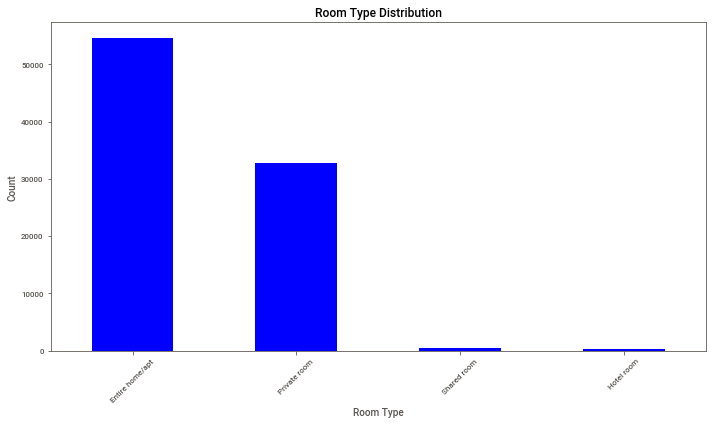

In [128]:
# Plotting the bar graph
plt.figure(figsize=(10, 6)) 
room_type_counts.plot(kind='bar', color='blue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

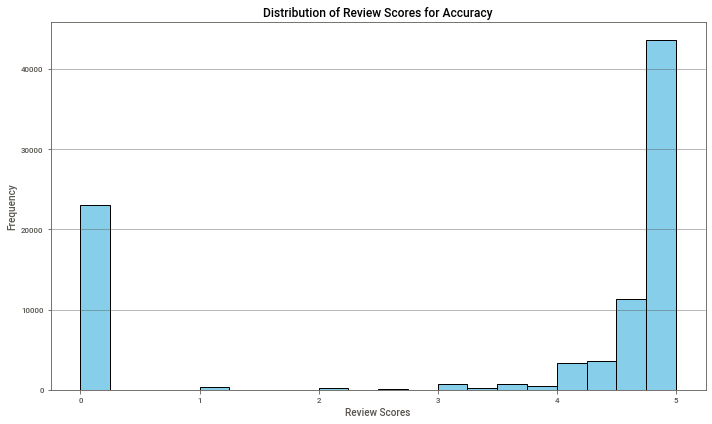

In [129]:
cleaned_scores = df1['review_scores_accuracy'].dropna()
plt.figure(figsize=(10, 6))  
plt.hist(cleaned_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Scores for Accuracy')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

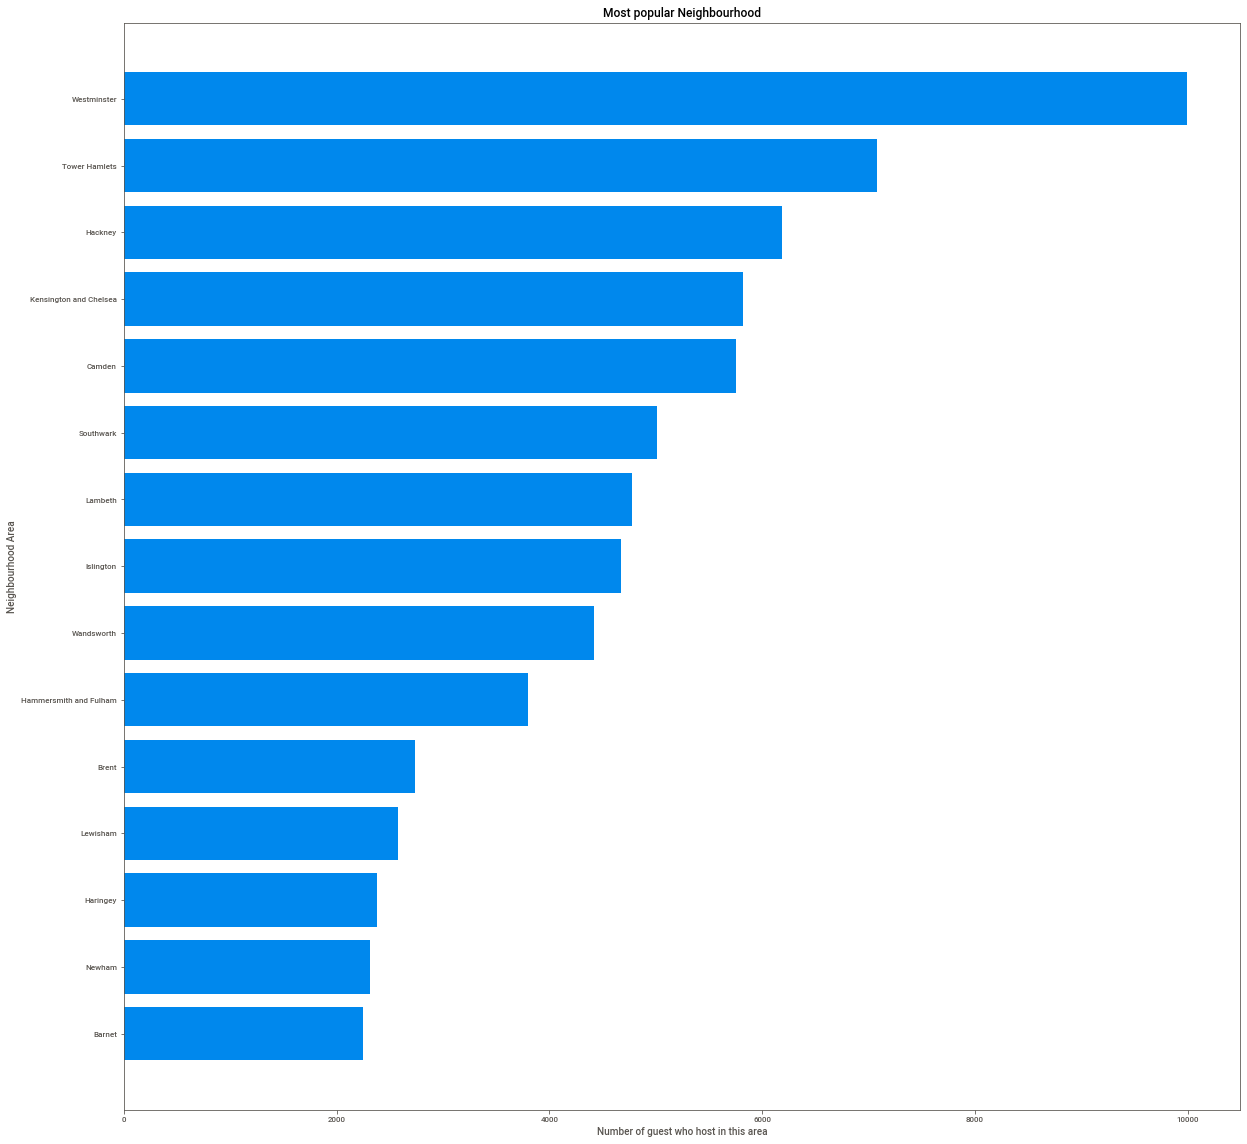

In [130]:
#plotting most popular neighbourhood
data = df.neighbourhood_cleansed.value_counts()[:15]
plt.figure(figsize=(20,20))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

## Classification of Listings:
The code below employs multiple conditions to classify listings within a dataset into 'Good' and 'Bad' types based on various host-related and review metrics. The conditions, including superhost status, identity verification, response rate, and review accuracy, are evaluated to assign labels to each listing.The resulting classifications offer insights into the quality assessment of individual listings, aiding subsequent analyses or decision-making processes related to property evaluation or host performance.
*  Reviews and Ratings: Guest reviews and ratings play a significant role. Higher ratings generally indicate a well-received listing.
*  Response Rate and Time: Hosts with higher response rates and quicker response times to guest inquiries are often preferred.
*  Superhost status: Being an Airbnb Superhost is about providing outstanding hospitality, which means being highly-rated, experienced, reliable, and responsive. 
*  Identity verified:  Having an identity verified, means that they have provided information which has been validated.

In [131]:
conditions = [
    (df1['host_is_superhost'] == 1),  # If host_is_superhost is 1, it is a good listing
    (df1['host_identity_verified'] == 0),  # If host_identity_verified is 0, it is a bad listing
    ((df1['host_response_rate'] < 90) & (df1['review_scores_accuracy'] <= 4.8)),  # If both conditions are met, it is a bad listing
    (df1['review_scores_accuracy'] > 4.8)  # If review_scores_rating is greater than 4.8, it is a good listing
]

labels = ['Good', 'Bad', 'Bad', 'Good']
df1['Listing_type'] = np.select(conditions, labels, default='Neutral')  

# Replace 'Neutral' with 'Bad' for the cases not classified as 'Good'
df1['Listing_type'].replace('Neutral', 'Bad', inplace=True)
print(df1.head())

                                   host_url  host_response_rate  \
0  https://www.airbnb.com/users/show/498201                 0.0   
1  https://www.airbnb.com/users/show/499704               100.0   
2   https://www.airbnb.com/users/show/54730               100.0   
3   https://www.airbnb.com/users/show/60302               100.0   
4  https://www.airbnb.com/users/show/497514                90.0   

   host_acceptance_rate  host_is_superhost  host_has_profile_pic  \
0                 100.0                0.0                   1.0   
1                  25.0                0.0                   1.0   
2                  88.0                0.0                   1.0   
3                  41.0                0.0                   1.0   
4                  75.0                1.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0              Wandsworth  51.44201   -0.18739   
1                     1.0  Hammersmith a

In [132]:
Listing_counts = df1['Listing_type'].value_counts()
# Display the count of 'Good' and 'Bad' listings
print(Listing_counts)

Bad     49418
Good    38528
Name: Listing_type, dtype: int64


In [133]:
#Converting GOOD to 1 and BAD to 0 
df1['Listing_type'] = df1['Listing_type'].apply(lambda x: '1' if x == 'Good' else '0')
print(df1['Listing_type'])

0        0
1        0
2        0
3        1
4        1
        ..
87941    1
87942    0
87943    0
87944    0
87945    0
Name: Listing_type, Length: 87946, dtype: object


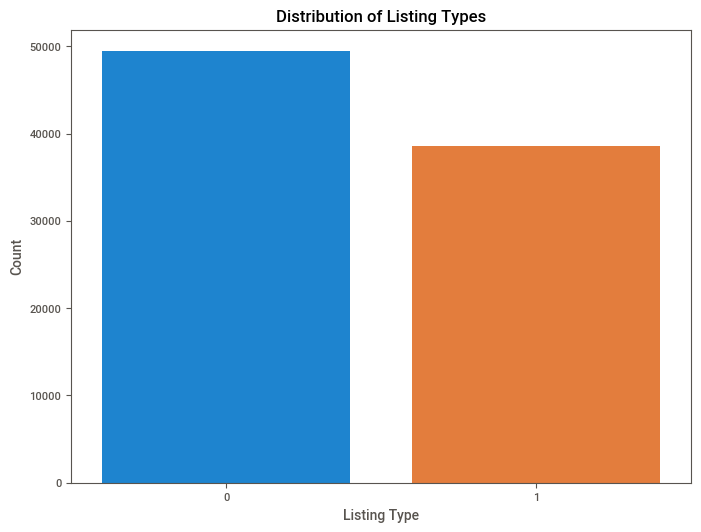

In [162]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Listing_type')
plt.title('Distribution of Listing Types')
plt.xlabel('Listing Type')
plt.ylabel('Count')
plt.show()  #Visualize the type of Listings

In [134]:
df1.dtypes

host_url                   object
host_response_rate        float64
host_acceptance_rate      float64
host_is_superhost         float64
host_has_profile_pic      float64
host_identity_verified    float64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
maximum_nights              int64
has_availability            int64
availability_365            int64
number_of_reviews           int64
number_of_reviews_ltm       int64
review_scores_rating      float64
review_scores_accuracy    float64
instant_bookable            int64
reviews_per_month         float64
room_type_encoded           int32
neighbourhood_encoded       int32
total_bathroom              int32
private_bathroom            int32
Listing_type  

In [135]:
df1['host_acceptance_rate'].fillna(0, inplace=True)

In [136]:
df1['Listing_type'] = df1['Listing_type'].astype(int) #convert datatype from object to int

In [137]:
#dividing columns based on categorical and numerical
categorical_col = []
numerical_col=[]
for column in df1.columns:
    
    if df1[column].dtypes != "float64" and df1[column].dtypes != "int32" and df1[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)
print(f"Numerical Col: {numerical_col}")
print(f"Categorical Col: {categorical_col}")

Numerical Col: ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'instant_bookable', 'reviews_per_month', 'room_type_encoded', 'neighbourhood_encoded', 'total_bathroom', 'private_bathroom', 'Listing_type']
Categorical Col: ['host_url', 'neighbourhood_cleansed', 'room_type', 'bathrooms_text']


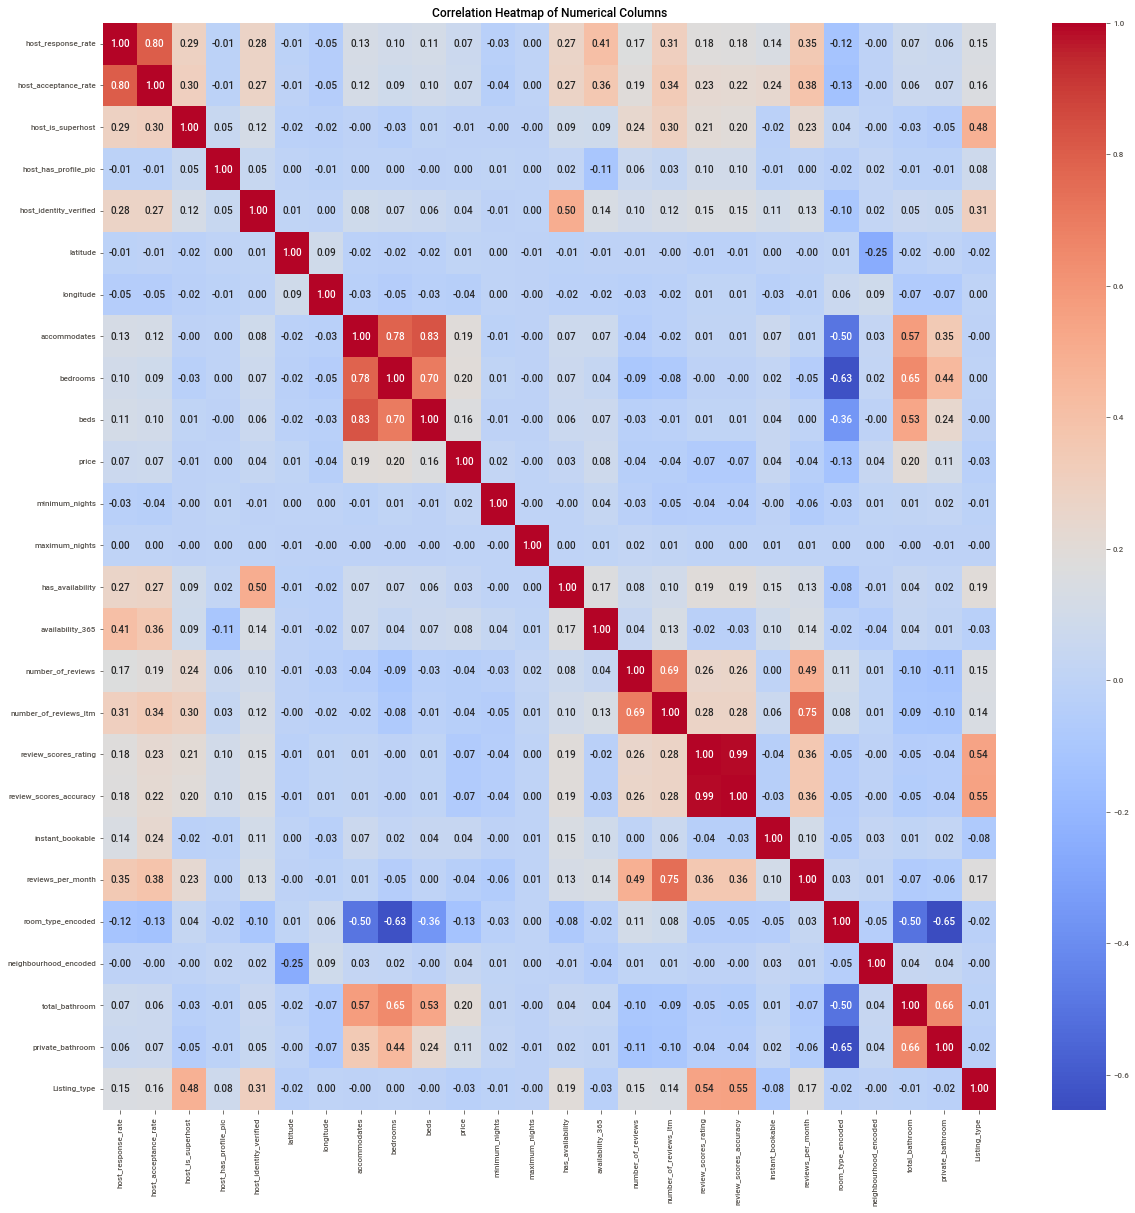

In [138]:
numerical_data = df1[numerical_col]
correlation_matrix = numerical_data.corr()
# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

The correlation heatmap analysis reveals that 'host_is_superhost,' 'review_scores_rating,' and 'host_identity_verified' exhibit the strongest correlations with the identified 'Listing_type.' These attributes demonstrate notable associations with the categorized listing types, suggesting their influential roles in determining the classification of listings as 'Good' or 'Bad.'  

In [139]:
df1.shape

(87946, 30)

In [140]:
df1.drop('bathrooms_text', axis=1, inplace=True)

## SweetViz Library

I'm utilizing Sweetviz library for visual summary and data comprehension due to its powerful capabilities in automating the exploratory data analysis (EDA) process. Sweetviz offers comprehensive and insightful visualizations, allowing for quick and thorough understanding of dataset characteristics, including distributions, correlations, missing values, and more. Its automated nature streamlines the analysis, providing detailed and intuitive visual summaries that assist in identifying patterns, outliers, and relationships within the data, ultimately facilitating efficient data-driven decision-making and further analysis

In [141]:
!pip install sweetviz
import sweetviz as sv
report = sv.analyze(df1)
report.show_html('EDA_Report.html') 
#to quickly gain a comprehensive understanding of the datasets through visualizations.

                                             |                                             | [  0%]   00:00 ->…

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Splitting and Standardizing the dataset

In [142]:
Y = df1['Listing_type'].values
X = df1[numerical_col].drop('Listing_type', axis=1).values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)
# Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2,random_state=123)

# Display the shapes of the train and test datasets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (70356, 25)
Shape of x_test: (17590, 25)
Shape of y_train: (70356,)
Shape of y_test: (17590,)


# DEVELOPING A PREDICTIVE MODEL:

## 1. Implementing Decision Tree Classifier for Listing Type Prediction

In [157]:
clf = DecisionTreeClassifier( max_depth=5,  
    min_samples_split=5,  
    min_samples_leaf=2,  
    max_leaf_nodes=20,  
    max_features='sqrt' )
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      9929
           1       0.86      0.78      0.82      7661

    accuracy                           0.85     17590
   macro avg       0.85      0.84      0.84     17590
weighted avg       0.85      0.85      0.85     17590



In [151]:
print(confusion_matrix(y_test, y_pred))

[[6495 3434]
 [ 827 6834]]


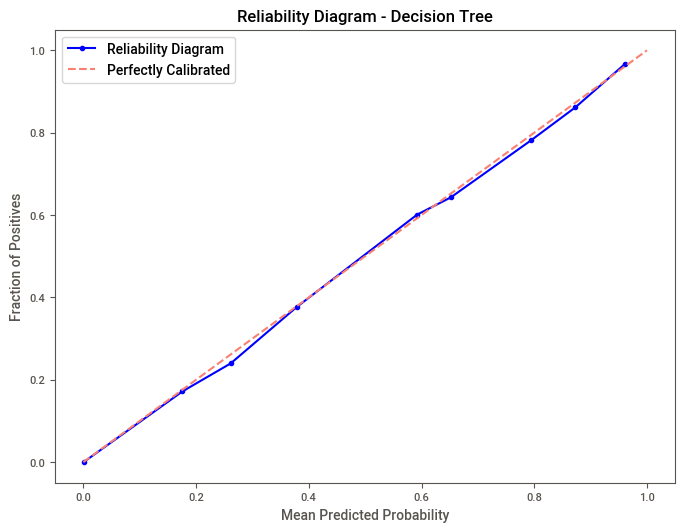

In [192]:
y_prob = clf.predict_proba(x_test)[:, 1]  
# Calculating the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)  
# Plotting the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='blue', label='Reliability Diagram')
plt.plot([0, 1], [0, 1], linestyle='--', color='salmon', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Reliability Diagram - Decision Tree')
plt.legend()
plt.show()

## Decision Tree Model evaluation :

* Accuracy (Overall Model Performance): The model achieves an accuracy of 85%, indicating that it correctly predicts the 'Listing_type' around 85% of the time.

* Precision and Recall:
For 'Bad' listings (label 0), the precision is 84%, implying that among the predicted 'Bad' listings, 84% are accurate.
The recall for 'Bad' listings is 91%, indicating that the model correctly identifies 91% of the actual 'Bad' listings.
For 'Good' listings (label 1), the precision is 86%, suggesting that among the predicted 'Good' listings, 86% are accurate.
The recall for 'Good' listings is 78%, signifying that the model correctly identifies 78% of the actual 'Good' listings.
F1-score: The F1-score, which combines precision and recall, is 0.87 for 'Bad' listings and 0.82 for 'Good' listings. This metric provides a balanced measure of a model's accuracy.

* Confusion Matrix:
The confusion matrix shows that among the 9,929 actual 'Bad' listings, the model correctly predicted 6,495 ('True Negatives') but misclassified 3,434 as 'Good' listings ('False Positives').
Among the 7,661 actual 'Good' listings, the model correctly predicted 6,834 ('True Positives') but misclassified 827 as 'Bad' listings ('False Negatives').


The model continues to demonstrate reasonable performance, displaying a good balance between precision and recall for both 'Bad' and 'Good' listings. However, it still shows a relatively higher number of 'False Negatives' (misclassifying 'Good' listings as 'Bad'), suggesting potential areas for further improvement to minimize this misclassification.

In [161]:
numerical_col_without_listing = numerical_col.copy()  
numerical_col_without_listing.remove('Listing_type')  # Removing 'Listing_type' from the copied list
feature_imp = pd.Series(clf.feature_importances_, index=numerical_col_without_listing).sort_values(ascending=False)
print (feature_imp)

review_scores_rating      0.362616
host_is_superhost         0.237436
number_of_reviews_ltm     0.179848
host_identity_verified    0.129166
review_scores_accuracy    0.034993
number_of_reviews         0.023127
maximum_nights            0.015022
reviews_per_month         0.012438
host_response_rate        0.002600
has_availability          0.001796
availability_365          0.000869
longitude                 0.000089
beds                      0.000000
price                     0.000000
minimum_nights            0.000000
host_acceptance_rate      0.000000
bedrooms                  0.000000
accommodates              0.000000
latitude                  0.000000
instant_bookable          0.000000
host_has_profile_pic      0.000000
room_type_encoded         0.000000
neighbourhood_encoded     0.000000
total_bathroom            0.000000
private_bathroom          0.000000
dtype: float64


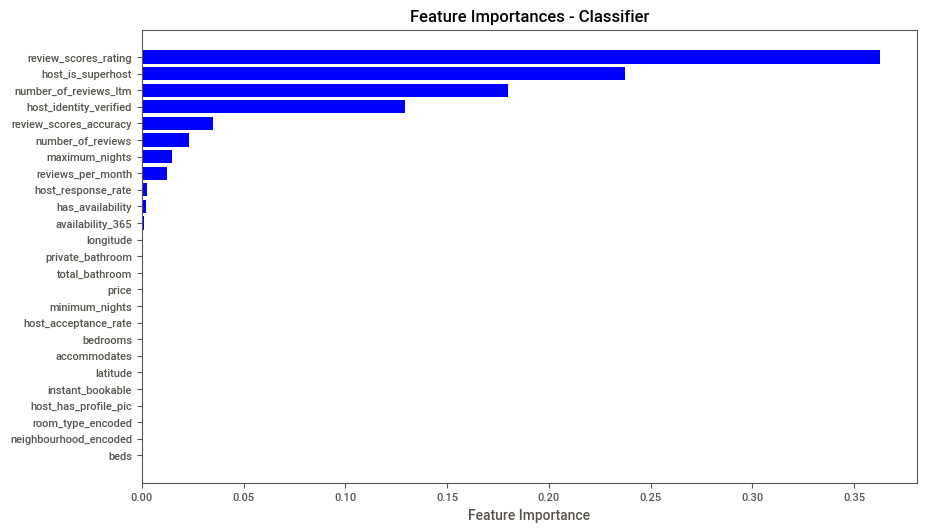

In [179]:
feature_imp_sorted = feature_imp.sort_values(ascending=True)
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_sorted.index, feature_imp_sorted.values, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Classifier')
plt.show()

## FEATURE IMPORTANCE:
The conditions set for classifying the Listing_type heavily influence the importance of features. By examining the above visualization we can say that :
* Review Scores (Rating, Accuracy):
review_scores_rating and review_scores_accuracy are the most influential features in predicting the Listing_type. Higher ratings or accuracy tend to correspond to a certain type of listing.
* Host Attributes (Superhost, Identity Verification):
host_is_superhost and host_identity_verified also play substantial roles in predicting the Listing_type. Being a superhost or having verified identity appears to influence the categorization.
* Review Metrics (Number of Reviews):
number_of_reviews_ltm and number_of_reviews have moderate importance, suggesting that recent and overall review frequency might contribute to distinguishing listing types.
* Other Features:
Other features like maximum_nights, reviews_per_month, and host_response_rate show minor importance, indicating less impact on predicting the Listing_type.

## 2. Implementing Logistic Regression for Listing Type Prediction

In [173]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)

# Predictions on the test set
y_pred_logi = log_reg.predict(x_test)

In [174]:
accuracy = accuracy_score(y_test, y_pred_logi)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred_logi))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9929
           1       0.99      1.00      0.99      7661

    accuracy                           0.99     17590
   macro avg       0.99      0.99      0.99     17590
weighted avg       0.99      0.99      0.99     17590



In [193]:
print(confusion_matrix(y_test, y_pred_logi))

[[9837   92]
 [  29 7632]]


## LOGISTIC REGRESSION MODEL EVALUATION :
* Accuracy (99%): 
The model correctly predicts the Listing_type with an accuracy of 99%, indicating a strong overall performance in classification.
* Precision and Recall:
Both precision and recall for both 'Bad' (label 0) and 'Good' (label 1) listings are exceptionally high, at or near 99%.
For 'Bad' listings, precision and recall are both 100%, suggesting that among the predicted 'Bad' listings, all are accurate and all actual 'Bad' listings are identified correctly ('True Positives').
For 'Good' listings, precision and recall are both around 99%, indicating accurate identification of 'Good' listings and minimal misclassification.
* F1-score:
The F1-scores are also extremely high for both classes, indicating a balanced performance between precision and recall.

* Confusion Matrix:
The confusion matrix further confirms the model's exceptional performance, with very few misclassifications ('False Positives' and 'False Negatives').

Overall, the model showcases an outstanding performance, demonstrating near-perfect classification accuracy with minimal misclassification across both 'Bad' and 'Good' listings.

In [176]:
feature_importance = log_reg.coef_[0]
feature_names = numerical_col_without_listing  # List of feature names 
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()  # Absolute coefficients

# Sort features by absolute coefficient values to determine importance
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients)

                   Feature  Coefficient  Abs_Coefficient
18  review_scores_accuracy    43.369607        43.369607
2        host_is_superhost    39.311440        39.311440
4   host_identity_verified     3.119489         3.119489
17    review_scores_rating     2.278637         2.278637
13        has_availability     0.166146         0.166146
16   number_of_reviews_ltm    -0.094871         0.094871
23          total_bathroom     0.081376         0.081376
1     host_acceptance_rate    -0.066889         0.066889
7             accommodates    -0.065969         0.065969
15       number_of_reviews     0.059568         0.059568
14        availability_365    -0.042599         0.042599
3     host_has_profile_pic     0.040321         0.040321
12          maximum_nights    -0.039981         0.039981
21       room_type_encoded     0.036418         0.036418
19        instant_bookable    -0.024170         0.024170
6                longitude    -0.019379         0.019379
5                 latitude     

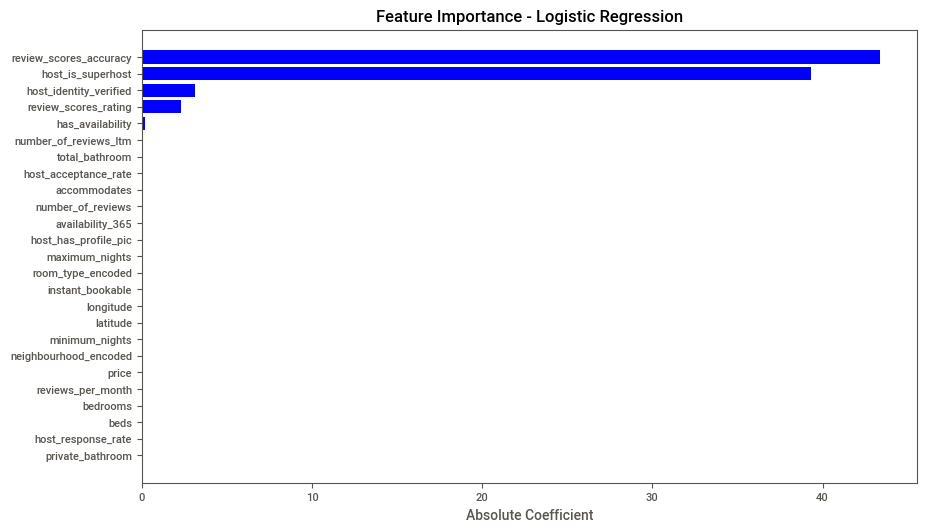

In [178]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Abs_Coefficient'], color='blue')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

## FEATURE IMPORTANCE:
The conditions set for classifying the Listing_type heavily influence the importance of features. By examining the above visualization we can say that :
Most Important Features:

* review_scores_accuracy: This feature holds the highest importance in predicting the Listing_type, indicating that accuracy in review scores strongly influences the categorization.
* host_is_superhost: Following closely, being a superhost appears to significantly impact the classification of listings into 'Good' or 'Bad'.
* host_identity_verified and review_scores_rating: These attributes also hold moderate importance, suggesting that verified identity and overall review scores contribute notably to predicting the Listing_type.


Less Important Features: Several other features exhibit relatively low importance in predicting the Listing_type, with coefficients close to zero or minimal absolute coefficients. These features include has_availability, number_of_reviews_ltm, total_bathroom, host_acceptance_rate, etc.

Overall Assessment:
The most influential features align with the expectations, indicating that aspects related to reviews, host status (superhost, identity verification), and overall review scores strongly impact the classification of listings. Other features, although present, seem to have minimal impact on predicting the Listing_type.

# MODEL COMPARISON: 

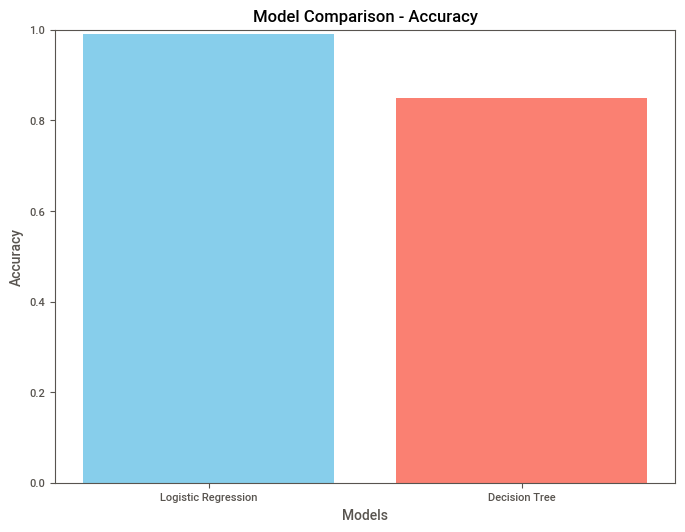

In [184]:
# Model Comparison Plot
log_reg_accuracy = 0.99  
decision_tree_accuracy = 0.85  
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = [log_reg_accuracy, decision_tree_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.title('Model Comparison - Accuracy')
plt.show()

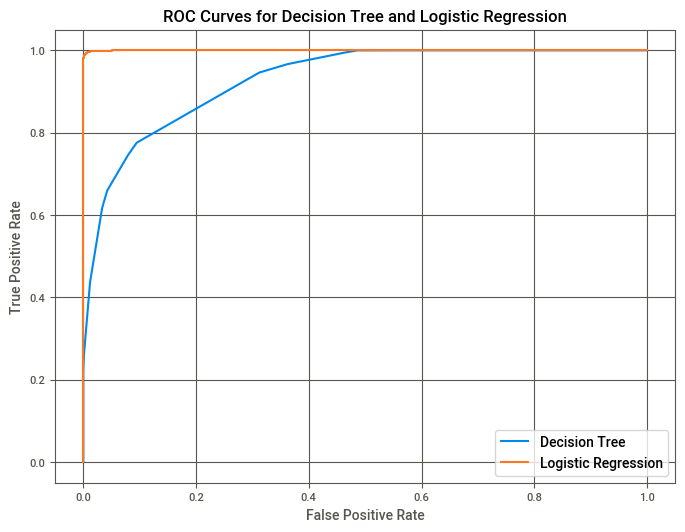

In [194]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_pred_prob_model1 = clf.predict_proba(x_test)[:, 1]
y_pred_prob_model2 = log_reg.predict_proba(x_test)[:, 1]
# Calculate ROC curve values
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred_prob_model1)
fpr_model2, tpr_model2, _ = roc_curve(y_test, y_pred_prob_model2)
# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, label='Decision Tree')
plt.plot(fpr_model2, tpr_model2, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree and Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# OVERALL ANALYSIS:

* Model Performance: The Logistic Regression model outperformed the Decision Tree model significantly with an accuracy of 99% compared to 85%. This indicates the Logistic Regression model's superior ability to correctly classify instances into 'Listing_type', demonstrating higher precision and recall.

* Feature Importance: Both models highlight similar influential features, such as review scores, host-related attributes (superhost status, identity verification), and some property-related details (number of reviews, accommodation specifics). The Logistic Regression model, with its feature coefficients, emphasizes the critical role of review-related metrics and host attributes in predicting 'Listing_type'.

* Limitations and Further Improvements:
The model's high accuracy might suggest potential overfitting, especially in the Logistic Regression model.
The way we decided on 'Listing_type' might not be completely fair because we used some rules that could be based on personal opinions rather than clear facts. This might make our classifications a bit unfair or not entirely accurate.
The feature importance rankings can sometimes be influenced by multicollinearity, affecting the coefficients' interpretations.

* Insights Gained:
Host-related attributes, especially those related to reviews and response rates, play a significant role in determining the listing type's classification.
The strong performance of the Logistic Regression model suggests its suitability for this classification task.

* Recommendations for Improvement:
Refinement in the 'Listing_type' creation process, perhaps by utilizing different thresholds or considering additional attributes, could enhance the model's robustness.
Addressing multicollinearity among features could offer more accurate feature importance rankings.
In summary, while the Logistic Regression model performed exceptionally well, potential issues such as overfitting and subjectivity in the 'Listing_type' creation process need attention for improved model generalization and fairness in classification. Further refinements and feature engineering might enhance the model's predictive capabilities.